
### This Lab is open from 11/3 at 6 am to 11/6 at 11:59 pm


We will use Iris data found here https://archive.ics.uci.edu/ml/datasets/Iris. It is one of the most used data sets in Data Science. You can just google or read more about it here https://en.wikipedia.org/wiki/Iris_flower_data_set.

 Let's load the data. The problem here is to classify which kind of flower it is with the values of the following 4 columns: sepal length, sepal width, petal length and petal width. This data set has three labels/species for the flowers: setosa, verginica, and versicolor. We do not need dependent column to use KMeans algorithm.

In [1]:
import numpy as np
import numpy.matlib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy.stats as st
import matplotlib.colors as colors
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
iris = pd.read_csv('iris-1.csv')
list(iris.columns)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

## Problem 1 [40 + 10]
Take x to be all the four numerical columns. We do NOT need variable y (the response variable) for KMeans to work. 

a) Use the KMeans algorithm to find 3 clusters of the data x (No test train split required). We chose 3 clusters because we hope that KMeans finds 3 clusters representing three species we have. Next, make predictions on x using KMeans and find predictions of y (labels). Finally, make a scatter plot of 3 clusters with their centers. Three clusters should have three different colors. Use petal length and petal width as x and y variable for plotting.

b) What are the three centers for the three clusters? Find Euclidean and Manhattan distances between each pair using python.

Please note that we do not usually have a way to compare the actual data with KMeans, so there is no simple way to check the accuracy of the KMeans. There are more advanced ways to check the accuracy or even do classification with KMeans. These topics are not parts of this course.

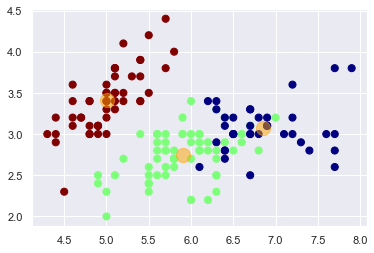

In [2]:
x=iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)
x=np.array(x)
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='jet')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='orange', s=200, alpha=0.5);

In [3]:
#part b
centers

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ]])

In [4]:
from scipy.spatial import distance
d1= distance.euclidean(centers[0], centers[1])
d2= distance.euclidean(centers[0], centers[2])
d3= distance.euclidean(centers[1], centers[0])
d4= distance.euclidean(centers[1], centers[2])
d5= distance.euclidean(centers[2], centers[0])
d6= distance.euclidean(centers[2], centers[1])
print("Euclidean Distances:\n",d1,d2,d3,d4,d5,d6)

Euclidean Distances:
 1.7971817988854317 5.015894269629268 1.7971817988854317 3.3538858932300446 5.015894269629268 3.3538858932300446


In [5]:
md1= distance.cityblock(centers[0], centers[1])
md2= distance.cityblock(centers[0], centers[2])
md3= distance.cityblock(centers[1], centers[0])
md4= distance.cityblock(centers[1], centers[2])
md5= distance.cityblock(centers[2], centers[0])
md6= distance.cityblock(centers[2], centers[1])
print("Manhattan Distances:\n",md1,md2,md3,md4,md5,md6)

Manhattan Distances:
 3.2594227504244486 8.293473684210527 3.2594227504244486 5.684645161290323 8.293473684210527 5.684645161290323


### Problem 2 (Optional bonus: 10 points)
Plot the decision boundary from the KMeans algorithm in problem 1. You are separating three clusters by lines in this problem. Some hints are here. https://datascience.stackexchange.com/questions/53918/is-there-a-way-to-put-a-separate-line-between-clusters-for-k-means-clustering

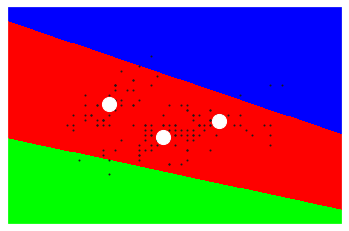

In [6]:
x_min, x_max = iris['sepal_length'].min() - 1, iris['sepal_length'].max() + 1
y_min, y_max = iris['sepal_width'].min() - 1, iris['sepal_width'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01), np.arange(y_min, y_max, .01))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel(), yy.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap='brg', aspect='auto', origin='lower')
plt.plot(x[:, 0], x[:, 1], 'k.', markersize=2)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=200, color='white', zorder=10)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()